# Выбор локации для скважины

Компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

Шаги для выбора локации:

- в избранном регионе ищут месторождения, для каждого определяют значения признаков;
- строят модель и оценивают объём запасов;
- выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- прибыль равна суммарной прибыли отобранных месторождений.

## Библиотеки

In [1]:
import os

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

PATH_GEO_DATA_0 = 'C:/Users/igors/OneDrive/Рабочий стол/Портфолио/7. Выбор локации для скважины/geo_data_0.csv'
PATH_GEO_DATA_1 = 'C:/Users/igors/OneDrive/Рабочий стол/Портфолио/7. Выбор локации для скважины/geo_data_1.csv'
PATH_GEO_DATA_2 = 'C:/Users/igors/OneDrive/Рабочий стол/Портфолио/7. Выбор локации для скважины/geo_data_0.csv'
BUDGET = 10e9
THOUSAND_BARREL_PRICE = 450e3
AMOUNT_OF_EXPLORED_WELLS = 500
AMOUNT_OF_THE_BEST_WELLS = 200

## Загрузка и подготовка данных

Подготовим данные:

1. загрузим данные;
2. просмотрим общую информацию о них;
3. проверим наличие пропусков;
4. проверима наличие дубликатов;
5. проверим статистические свойства признаков.

In [2]:
if os.path.exists(PATH_GEO_DATA_0):
    try:
        data_0 = pd.read_csv(PATH_GEO_DATA_0)
    except:
        print('Ошибка в считывании данных.')
else:
    print(f'Путь {PATH_GEO_DATA_1} не сущесвтует.')

if os.path.exists(PATH_GEO_DATA_1):
    try:
        data_1 = pd.read_csv(PATH_GEO_DATA_1)
    except:
        print('Ошибка в считывании данных.')
else:
    print(f'Путь {PATH_GEO_DATA_1} не сущесвтует.')

if os.path.exists(PATH_GEO_DATA_2):
    try:
        data_2 = pd.read_csv(PATH_GEO_DATA_2)
    except:
        print('Ошибка в считывании данных.')
else:
    print(f'Путь {PATH_GEO_DATA_2} не сущесвтует.')

In [3]:
display(data_0.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
display(data_1.head())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
display(data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


**Описание данных**

Признаки:
- `id` - уникальный идентификатор скважины в БД
- `f0`, `f1`, `f2` — признаки скважин

Целевой признак:
- `product` — объем запасов в скважине

In [6]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_0.duplicated().sum()

0

In [10]:
data_1.duplicated().sum()

0

In [11]:
data_2.duplicated().sum()

0

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


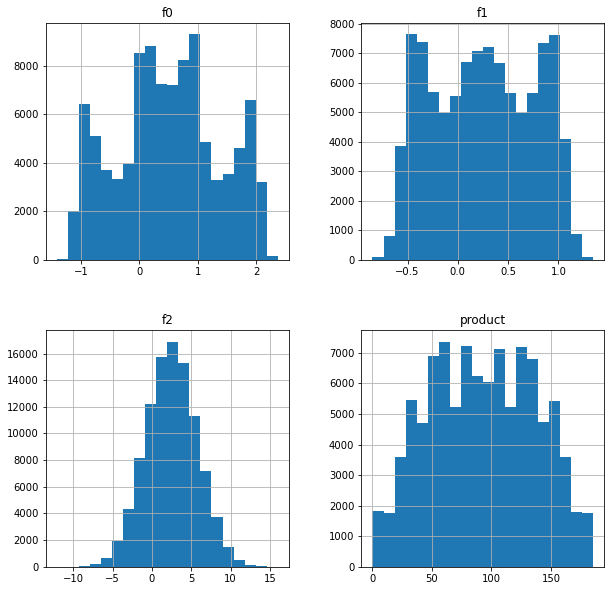

In [12]:
data_0.hist(bins=20, figsize=(10, 10))
data_0.describe()

In [13]:
data_0.corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,-0.471395,-0.002685,0.128417
f1,-0.471395,1.000000,0.001413,-0.181143
f2,-0.002685,0.001413,1.000000,0.486394
product,0.128417,-0.181143,0.486394,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


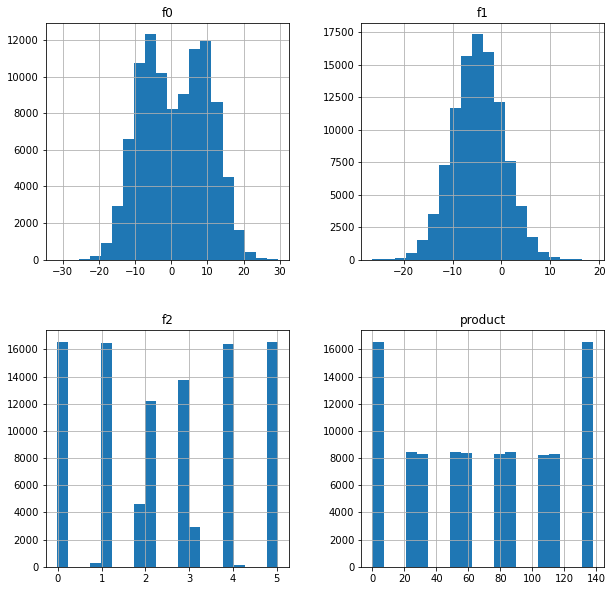

In [14]:
data_1.hist(bins=20, figsize=(10, 10))
data_1.describe()

In [15]:
data_1.corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,0.182248,-0.002000,-0.122869
f1,0.182248,1.000000,-0.003678,-0.033908
f2,-0.002000,-0.003678,1.000000,0.975605
product,-0.122869,-0.033908,0.975605,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


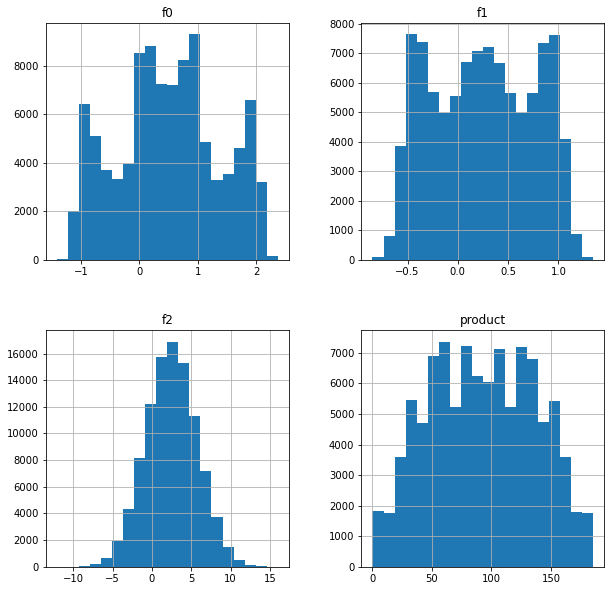

In [16]:
data_2.hist(bins=20, figsize=(10, 10))
data_2.describe()

In [17]:
data_2.corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,-0.471395,-0.002685,0.128417
f1,-0.471395,1.000000,0.001413,-0.181143
f2,-0.002685,0.001413,1.000000,0.486394
product,0.128417,-0.181143,0.486394,1.000000


### Выводы

- Столбец `id` нужен для работы с БД, но не является признаком скважины, поэтому он неинформативен - его следует убрать из данных;
- пропусков в данных нет;
- дубликтов в данных нет;
- все информативные признаки и целевой признак - количественные;
- согласно статистическому описанию признаков и их диаграммам можно сделать вывод, что в данных отсутствуют явные выбросы; 
- корреляции в признаках, а значит и мультиколлинеарности, нет;

In [18]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

In [19]:
data_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


**Данные готовы к работе**

## Обучение и проверка модели

Разобьём данные на обучающие и валидационные выборки в соотношении 75%/25%.

In [20]:
data = [data_0, data_1, data_2]
features = []
target = []
features_train = []
features_valid = []
target_train = []
target_valid = []

for i in range(len(data)):
    features.append(data[i].drop('product', axis=1))
    target.append(data[i]['product'])    
    features_train_, features_valid_, target_train_, target_valid_ = train_test_split(features[i], target[i], test_size=0.25, random_state=0)
    features_train.append(features_train_)
    features_valid.append(features_valid_)
    target_train.append(target_train_)
    target_valid.append(target_valid_)
    
    
print(f'Размер обучающих выборок - {len(features_train[0])}')
print(f'Размер валидационных выборок - {len(features_valid[0])}')


Размер обучающих выборок - 75000
Размер валидационных выборок - 25000


Обучим модели.

In [21]:
models = []
predictions = []
for i in range(len(data)):
    models.append(LinearRegression().fit(features_train[i], target_train[i]))
    predictions.append(pd.Series(models[i].predict(features_valid[i])))  

Представим визуально реальные данные и предсказания модели для валидационной выборки

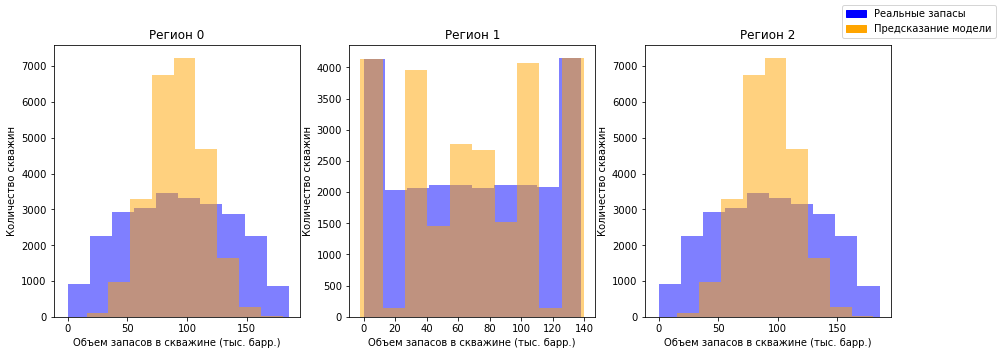

In [22]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15, 5)
blue_patch = mpatches.Patch(color='blue', label='Реальные запасы')
orange_patch = mpatches.Patch(color='orange', label='Предсказание модели')
fig.legend(handles=[blue_patch, orange_patch], loc=1)

for i in range(len(data)):
    axes[i].hist(target_valid[i], color='blue', alpha=0.5)
    axes[i].hist(predictions[i], color='orange', alpha=0.5)
    axes[i].set_title(f'Регион {i}')
    axes[i].set_xlabel('Объем запасов в скважине (тыс. барр.)')
    axes[i].set_ylabel('Количество скважин')
    
plt.show()

Проверим модели на валидационных выборках: выведем R2 и RMSE

In [23]:
for i in range(len(models)): 
    R2 = models[i].score(features_valid[i], target_valid[i])  
    RMSE = mean_squared_error(target_valid[i], predictions[i], squared=False)
    print(f'Регион {i}:')
    print(f'R2 модели - {R2}')
    print(f'RMSE модели - {RMSE}')
    print(f'cредний запас сырья - {target_valid[i].mean()}')
    print(f'cредний запас предсказанного сырья - {predictions[i].mean()}')
    print()
    

Регион 0:
R2 модели - 0.2809263356941697
RMSE модели - 37.48100896950594
cредний запас сырья - 92.466784925883
cредний запас предсказанного сырья - 92.27144852242247

Регион 1:
R2 модели - 0.9996271830439484
RMSE модели - 0.887257305221933
cредний запас сырья - 69.1543605565097
cредний запас предсказанного сырья - 69.15162398290732

Регион 2:
R2 модели - 0.2809263356941697
RMSE модели - 37.48100896950594
cредний запас сырья - 92.466784925883
cредний запас предсказанного сырья - 92.27144852242247



### Выводы

 - модели дли каждого региона обучены; 
 - метрика R2 для каждой из них больше единицы, следовательно, модели работают лучше случайного регрессора. Значиние R2 для первого региона близко к 1, значит, модель высокого качества; 
 - среднеквадратичные ошибки моделей для регионов 0 и 2 достаточно велики и достигают 35-45% от среднего значения по региону. Среднеквадратичное отклонение в регионе 1 мало. 

## Подготовка к расчёту прибыли

Рассчиатем достаточный для безубыточной разработки новой скважины средний объем сырья в тысячах баррелей.

In [24]:
suffisient_volume = BUDGET/(AMOUNT_OF_THE_BEST_WELLS * THOUSAND_BARREL_PRICE)
suffisient_volume

111.11111111111111

Полученное значение превосходит средние значения запасов сырья скважин во всех рассматриваемых регионах.

### Выводы

Было найдено среднее значение сырья которым должна обладать скважина для безубыточной разработки. Несмотря на то, что оно превосходит средние значения сырья в скважинах каждого региона, судя по гистограммам объемов запаса сырья, в каждом регионе найдётся более 200 скважин, с б**о**льшим запасом сырья, как в действительности, так и для предсказаний, с которыми будет проводиться дальнейшая работа.

## Расчёт прибыли и рисков 

### Рассчёт прибыли

Напишем функцию для подсчёта прибыли по предсказаниям в регионе.

In [25]:
def calculate_income(target, prediction):
    target_reindexed = target.reset_index(drop=True)
    prediction_sorted = prediction.sort_values(ascending=False)
    target_sorted = target_reindexed.loc[prediction_sorted.index][:AMOUNT_OF_THE_BEST_WELLS]    
    income = target_sorted.sum() * THOUSAND_BARREL_PRICE - BUDGET
    return income

In [26]:
for i in range(len(data)):
    print(f'Максимальная прогнозируемя прибыль в регионе {i} составит {calculate_income(target_valid[i], predictions[i])}')

Максимальная прогнозируемя прибыль в регионе 0 составит 3363408079.6079483
Максимальная прогнозируемя прибыль в регионе 1 составит 2415086696.681511
Максимальная прогнозируемя прибыль в регионе 2 составит 3363408079.6079483


### Рассчёт рисков

Напишем функцию, которая с помощью bootstrep рассчитает среднюю прибыль, 95%-й доверительный интервал и риск убытков. В ходе bootstrep будем формировать подвыборки целевого признака из 500 объектов, т.к. при разведке региона исследуют 500 точек.

In [27]:
def calculate_mean_95CI_risk(target, prediction):

    state = np.random.RandomState(0)
    target_reindexed = target.reset_index(drop=True)    
    values = []
    for i in range(1000):
        prediction_subsample = prediction.sample(AMOUNT_OF_EXPLORED_WELLS, replace=True, random_state=state)
        target_subsample = target_reindexed[prediction_subsample.index] 
        values.append(calculate_income(target_reindexed, prediction_subsample))        
    
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    CI = [lower, upper]
    
    step = 0.0001
    risk = 0    
    for i in np.arange(0, 1, step):
        if values.quantile(i) >= 0:
            risk = (i - step)
            break
    
    return mean, CI, risk

Рассчитаем среднюю прибыль, 95%-й доверительный интервал и риск убытков для каждого региона.

In [28]:
for i in range(len(data)):
    mean, CI, risk = calculate_mean_95CI_risk(target_valid[i], predictions[i])
    print(f"Инофрмация о регионе {i}:")
    print(f"\t- средняя прибыль составит {mean:.0f};")
    print(f"\t- 95%-й доверительный интервал - [{CI[0]:.0f}; {CI[1]:.0f}];")
    print(f"\t- риск убытков составляет {risk:.2%}.")
    print()

Инофрмация о регионе 0:
	- средняя прибыль составит 442871777;
	- 95%-й доверительный интервал - [-49234992; 921134684];
	- риск убытков составляет 3.85%.

Инофрмация о регионе 1:
	- средняя прибыль составит 472926700;
	- 95%-й доверительный интервал - [71697098; 832287543];
	- риск убытков составляет 0.89%.

Инофрмация о регионе 2:
	- средняя прибыль составит 442871777;
	- 95%-й доверительный интервал - [-49234992; 921134684];
	- риск убытков составляет 3.85%.



Оформим результаты в сравнительную таблицу.

|Регион|средняя прибыль|95%-й доверительный интервал|риск убытков|
|:-|:-|:-|:-|
|0|442871777|[-49234992; 921134684]|3.85%|
|1|472926700|[71697098; 832287543]|0.89%|
|2|442871777|[-49234992; 921134684]|3.85%|

Только в регионе 1 риск убытков меньше 2.5%, следовательно, для разработки стоит выбрать именно его. Также стоит отметить, что он в среднем является самым прибыльным. Следовательно, **самым перспективным регионом для разработки является регион 0**.

## Общий вывод

В ходе работы 

1. была проведена подготовка данных:
    - данные были загружены;
    - дубликатов и пропусков не было обнаружено;
    - данные были описаны статистически и исследованы на корреляцию;
    - были удалены неинформативные признаки;
    - данные были разделены на признаки и целевой признак, а также на обучающие и валидационные выборки;
3. для каждого региона:
	- на соответствующей обучающей выборке была обучена своя модель;
    - с помощью моделей были сделаны предсказания на валидационной выборки;
    - были построены гистограммы запаса сырья для реальных и предсказанных данных;
    - на основе предсказаний и реальных данных были были рассчтаны средний запас сырья в скважинах, метрики модели R2 и RMSE;
4. была произведена подготовка к рассчётам прибыли и рисков:
    - были созданы константы для всех ключевых значений;
    - для каждого региона было посчитано минимальное среднее количество запаса сырья в скважине для безубыточной разработки;
5. для каждого региона были посчитаны прибыль и риски:
    - была написана функция для подсчёта прибыли двухсот скважин с самым большим запасов сырья;
    - была рассчитана максимальная прибыль на основе предсказанных данных;
    - была написана функция, которая с помощью техники bootstrap рассчитывает среднюю прибыль, 95%-й доверительный интервал и риск убытков;
    - были рассчитаны средняя прибыль, 95%-й доверительный интервал и риск убытков, на основании данных была построена сравнительная таблица;
6. был определён самый перспективный для разработки регион. Им стал регион 1.